In [61]:
infile = open('Bot-quad.dat','r')


In [62]:
file_content = infile.read()

#Print the data in the file
print( file_content )
infile.close()


10000  7.119591  -43.861974  -0.050597
10002  7.109183  -43.862086  -0.051016
10003  7.104015  -43.862473  -0.051040
10004  7.098773  -43.862775  -0.051113
10005  7.093689  -43.863195  -0.051118
10006  7.106570  -43.826930  -0.050626
10007  7.101258  -43.827594  -0.050677
10008  7.096174  -43.828266  -0.050704
10009  7.091082  -43.828808  -0.050810
10010  7.117439  -43.496798  -0.049824
10011  7.112304  -43.496697  -0.050288
10012  7.107279  -43.497514  -0.050325
10013  7.102085  -43.498288  -0.050393
10014  7.097039  -43.499116  -0.050429
10015  7.091909  -43.500069  -0.050411
10016  7.130997  -43.483444  -0.049680
10017  7.125889  -43.483640  -0.050030
10018  7.121251  -43.465616  -0.050095
10019  7.135442  -43.457396  -0.049630
10020  7.115580  -43.459214  -0.050141
10021  7.110019  -43.460044  -0.050152
10022  7.104994  -43.460725  -0.050193
10023  7.099841  -43.461472  -0.050219
10024  7.094574  -43.462189  -0.050267
10025  7.130573  -43.442173  -0.050066
10026  7.125549  -43.4427

In [59]:
i=0
for line in file_content.split('\n'):
    print (i, '\n', line)
    i+=1

0 
 10000  7.119591  -43.861974  -0.050597
1 
 10002  7.109183  -43.862086  -0.051016
2 
 10003  7.104015  -43.862473  -0.051040
3 
 10004  7.098773  -43.862775  -0.051113
4 
 10005  7.093689  -43.863195  -0.051118
5 
 10006  7.106570  -43.826930  -0.050626
6 
 10007  7.101258  -43.827594  -0.050677
7 
 10008  7.096174  -43.828266  -0.050704
8 
 10009  7.091082  -43.828808  -0.050810
9 
 10010  7.117439  -43.496798  -0.049824
10 
 10011  7.112304  -43.496697  -0.050288
11 
 10012  7.107279  -43.497514  -0.050325
12 
 10013  7.102085  -43.498288  -0.050393
13 
 10014  7.097039  -43.499116  -0.050429
14 
 10015  7.091909  -43.500069  -0.050411
15 
 10016  7.130997  -43.483444  -0.049680
16 
 10017  7.125889  -43.483640  -0.050030
17 
 10018  7.121251  -43.465616  -0.050095
18 
 10019  7.135442  -43.457396  -0.049630
19 
 10020  7.115580  -43.459214  -0.050141
20 
 10021  7.110019  -43.460044  -0.050152
21 
 10022  7.104994  -43.460725  -0.050193
22 
 10023  7.099841  -43.461472  -0.05021

 10608  7.108382  -40.246480  -0.048786
608 
 10609  7.096072  -40.254089  -0.048813
609 
 10610  7.091076  -40.257130  -0.048852
610 
 10611  7.132343  -40.206518  -0.048376
611 
 10612  7.127193  -40.208928  -0.048714
612 
 10613  7.115339  -40.216447  -0.048688
613 
 10614  7.104207  -40.223300  -0.048778
614 
 10615  7.123215  -40.184526  -0.048420
615 
 10616  7.111232  -40.192200  -0.048525
616 
 10617  7.100134  -40.199490  -0.048573
617 
 10618  7.095013  -40.202916  -0.048581
618 
 10619  7.089934  -40.206092  -0.048686
619 
 10620  7.134667  -40.149728  -0.047965
620 
 10621  7.127195  -40.154463  -0.048130
621 
 10622  7.119085  -40.160249  -0.048062
622 
 10623  7.107157  -40.168330  -0.048159
623 
 10624  7.122865  -40.132121  -0.047644
624 
 10625  7.114863  -40.137582  -0.047728
625 
 10626  7.103000  -40.145902  -0.047791
626 
 10627  7.097841  -40.149605  -0.047793
627 
 10628  7.092836  -40.153128  -0.047831
628 
 10629  7.134320  -40.102000  -0.047033
629 
 10630  7.

 11111  7.090017  -37.167082  -0.049333
1108 
 11112  7.134735  -37.097150  -0.048308
1109 
 11113  7.129485  -37.100691  -0.048453
1110 
 11114  7.124182  -37.104507  -0.048513
1111 
 11115  7.119053  -37.108311  -0.048534
1112 
 11116  7.113459  -37.112431  -0.048579
1113 
 11117  7.107719  -37.116749  -0.048597
1114 
 11118  7.101887  -37.121076  -0.048654
1115 
 11119  7.092576  -37.128115  -0.048715
1116 
 11120  7.131937  -37.063197  -0.047936
1117 
 11121  7.126591  -37.067211  -0.047969
1118 
 11122  7.121120  -37.071360  -0.047997
1119 
 11123  7.115839  -37.075356  -0.048033
1120 
 11124  7.110429  -37.079500  -0.048062
1121 
 11125  7.104887  -37.083709  -0.048116
1122 
 11126  7.098955  -37.088205  -0.048189
1123 
 11127  7.095253  -37.059496  -0.047828
1124 
 11128  7.090207  -37.063168  -0.047954
1125 
 11129  7.134662  -36.999109  -0.047321
1126 
 11130  7.129638  -37.002416  -0.047494
1127 
 11131  7.124508  -37.006186  -0.047525
1128 
 11132  7.119255  -37.010131  -0.0

 11618  7.101933  -34.259484  -0.047454
1608 
 11619  7.096955  -34.264380  -0.047458
1609 
 11620  7.123773  -34.222112  -0.047153
1610 
 11621  7.134535  -34.196399  -0.046851
1611 
 11622  7.118810  -34.211082  -0.047051
1612 
 11623  7.112051  -34.217598  -0.047077
1613 
 11624  7.093338  -34.235827  -0.047133
1614 
 11625  7.128395  -34.190345  -0.046553
1615 
 11626  7.107154  -34.209460  -0.047046
1616 
 11627  7.101978  -34.214387  -0.047081
1617 
 11628  7.124090  -34.169809  -0.047095
1618 
 11629  7.115651  -34.178023  -0.047031
1619 
 11630  7.097482  -34.195056  -0.047177
1620 
 11631  7.090485  -34.201898  -0.047146
1621 
 11632  7.134836  -34.145597  -0.047261
1622 
 11633  7.110750  -34.168034  -0.047444
1623 
 11634  7.103612  -34.174928  -0.047428
1624 
 11635  7.128633  -34.134958  -0.047186
1625 
 11636  7.120304  -34.142147  -0.047464
1626 
 11637  7.132727  -34.108675  -0.047576
1627 
 11638  7.115333  -34.125614  -0.047531
1628 
 11639  7.108274  -34.132248  -0.0

2107 
 12118  7.100831  -30.974446  -0.047168
2108 
 12119  7.093952  -30.979067  -0.047152
2109 
 12120  7.134928  -30.947273  -0.046923
2110 
 12121  7.110212  -30.962787  -0.047149
2111 
 12122  7.129893  -30.939027  -0.047074
2112 
 12123  7.118197  -30.946536  -0.047101
2113 
 12124  7.105674  -30.945013  -0.047182
2114 
 12125  7.089927  -30.954607  -0.047350
2115 
 12126  7.124949  -30.927387  -0.047110
2116 
 12127  7.097358  -30.944936  -0.047101
2117 
 12128  7.113521  -30.929460  -0.047082
2118 
 12129  7.093167  -30.922377  -0.047052
2119 
 12130  7.135205  -31.272440  -0.047013
2120 
 12131  7.130127  -31.272602  -0.047135
2121 
 12132  7.125065  -31.272742  -0.047144
2122 
 12133  7.119912  -31.272881  -0.047131
2123 
 12134  7.114882  -31.273017  -0.047153
2124 
 12135  7.109803  -31.273156  -0.047149
2125 
 12136  7.104658  -31.273299  -0.047157
2126 
 12137  7.099652  -31.273435  -0.047139
2127 
 12138  7.094611  -31.273570  -0.047126
2128 
 12139  7.089626  -31.270286

In [64]:
r,theta,z=[],[],[]
for line in file_content.split('\n'):
    try:
        i,r,theta,z = line.split()
        print (i, r, theta, z)
    except ValueError:
        continue

10000 7.119591 -43.861974 -0.050597
10002 7.109183 -43.862086 -0.051016
10003 7.104015 -43.862473 -0.051040
10004 7.098773 -43.862775 -0.051113
10005 7.093689 -43.863195 -0.051118
10006 7.106570 -43.826930 -0.050626
10007 7.101258 -43.827594 -0.050677
10008 7.096174 -43.828266 -0.050704
10009 7.091082 -43.828808 -0.050810
10010 7.117439 -43.496798 -0.049824
10011 7.112304 -43.496697 -0.050288
10012 7.107279 -43.497514 -0.050325
10013 7.102085 -43.498288 -0.050393
10014 7.097039 -43.499116 -0.050429
10015 7.091909 -43.500069 -0.050411
10016 7.130997 -43.483444 -0.049680
10017 7.125889 -43.483640 -0.050030
10018 7.121251 -43.465616 -0.050095
10019 7.135442 -43.457396 -0.049630
10020 7.115580 -43.459214 -0.050141
10021 7.110019 -43.460044 -0.050152
10022 7.104994 -43.460725 -0.050193
10023 7.099841 -43.461472 -0.050219
10024 7.094574 -43.462189 -0.050267
10025 7.130573 -43.442173 -0.050066
10026 7.125549 -43.442751 -0.050126
10027 7.121223 -43.420469 -0.049956
10028 7.112928 -43.421709 -0

10427 7.096622 -41.233773 -0.048528
10428 7.090864 -41.236598 -0.048582
10429 7.128193 -41.203647 -0.048102
10430 7.115641 -41.209601 -0.048288
10431 7.123379 -41.190782 -0.048381
10432 7.110667 -41.197347 -0.048365
10433 7.134525 -41.169816 -0.048056
10434 7.105749 -41.183840 -0.048410
10435 7.100650 -41.186439 -0.048440
10436 7.095469 -41.189194 -0.048429
10437 7.090450 -41.191758 -0.048467
10438 7.129661 -41.158148 -0.047909
10439 7.119755 -41.162711 -0.048153
10440 7.124622 -41.147615 -0.048284
10441 7.110345 -41.155454 -0.048090
10442 7.115465 -41.140530 -0.048092
10443 7.103827 -41.146173 -0.048239
10444 7.098783 -41.148815 -0.048222
10445 7.093653 -41.151459 -0.048231
10446 7.134671 -41.119976 -0.047964
10447 7.128706 -41.113615 -0.048042
10448 7.121249 -41.116465 -0.048424
10449 7.112167 -41.108802 -0.048490
10450 7.107147 -41.111210 -0.048563
10451 7.090466 -41.119756 -0.048592
10452 7.116984 -41.094844 -0.048476
10453 7.102153 -41.102078 -0.048585
10454 7.097153 -41.104639 -0

10802 7.123448 -39.228446 -0.047998
10803 7.111074 -39.239393 -0.048124
10804 7.105963 -39.243938 -0.048177
10805 7.133641 -39.201152 -0.047926
10806 7.118514 -39.214366 -0.048147
10807 7.101025 -39.230181 -0.048251
10808 7.095966 -39.234781 -0.048284
10809 7.090843 -39.239518 -0.048296
10810 7.128956 -39.183543 -0.048037
10811 7.123835 -39.188240 -0.048036
10812 7.113837 -39.197163 -0.048153
10813 7.108600 -39.201996 -0.048158
10814 7.134346 -39.155931 -0.048006
10815 7.119321 -39.169682 -0.048098
10816 7.103979 -39.183840 -0.048204
10817 7.098855 -39.188695 -0.048204
10818 7.093640 -39.193574 -0.048234
10819 7.129876 -39.137224 -0.047963
10820 7.124709 -39.142124 -0.047936
10821 7.114670 -39.151294 -0.048049
10822 7.109447 -39.156185 -0.048068
10823 7.134411 -39.110418 -0.047884
10824 7.120040 -39.123733 -0.047979
10825 7.104939 -39.137842 -0.048091
10826 7.099802 -39.142770 -0.048092
10827 7.094591 -39.147655 -0.048147
10828 7.089563 -39.152076 -0.048324
10829 7.129770 -39.093882 -0

11180 7.095068 -36.771332 -0.048785
11181 7.090055 -36.774017 -0.048999
11182 7.134851 -36.688996 -0.047642
11183 7.129569 -36.692238 -0.047678
11184 7.118039 -36.699446 -0.047726
11185 7.113014 -36.702562 -0.047769
11186 7.107899 -36.705750 -0.047814
11187 7.102904 -36.708969 -0.047819
11188 7.097823 -36.712264 -0.047825
11189 7.092679 -36.715581 -0.047846
11190 7.125836 -36.663861 -0.047397
11191 7.135182 -36.632115 -0.047200
11192 7.130092 -36.635024 -0.047350
11193 7.121654 -36.640329 -0.047416
11194 7.116532 -36.643537 -0.047470
11195 7.111319 -36.646821 -0.047522
11196 7.106261 -36.650052 -0.047563
11197 7.101110 -36.653422 -0.047581
11198 7.096106 -36.656671 -0.047612
11199 7.091053 -36.660012 -0.047629
11200 7.125661 -36.615044 -0.047465
11201 7.134819 -36.587871 -0.047526
11202 7.129687 -36.591149 -0.047614
11203 7.120989 -36.597009 -0.047649
11204 7.115957 -36.600294 -0.047722
11205 7.110779 -36.603781 -0.047758
11206 7.105570 -36.607203 -0.047836
11207 7.100483 -36.610738 -0

11561 7.090147 -34.556641 -0.047643
11562 7.122193 -34.509828 -0.047666
11563 7.117044 -34.514611 -0.047694
11564 7.111774 -34.519580 -0.047699
11565 7.106665 -34.524317 -0.047740
11566 7.097224 -34.533266 -0.047752
11567 7.134957 -34.480248 -0.047267
11568 7.101883 -34.511441 -0.047521
11569 7.127778 -34.468088 -0.046987
11570 7.119545 -34.475306 -0.047333
11571 7.114268 -34.480460 -0.047366
11572 7.109103 -34.485536 -0.047389
11573 7.094375 -34.500177 -0.047425
11574 7.132497 -34.444409 -0.047099
11575 7.104213 -34.472174 -0.047241
11576 7.099186 -34.477198 -0.047250
11577 7.089605 -34.485848 -0.047627
11578 7.125008 -34.433779 -0.047113
11579 7.116739 -34.441951 -0.047161
11580 7.111195 -34.447548 -0.047158
11581 7.095681 -34.447421 -0.047233
11582 7.134886 -34.391128 -0.046902
11583 7.121376 -34.404564 -0.047056
11584 7.107631 -34.418583 -0.047122
11585 7.102529 -34.423746 -0.047171
11586 7.090673 -34.436106 -0.047172
11587 7.127075 -34.383857 -0.046940
11588 7.116487 -34.394258 -0

11936 7.105923 -32.400517 -0.047529
11937 7.100874 -32.406093 -0.047505
11938 7.094496 -32.413047 -0.047520
11939 7.134551 -32.330686 -0.047673
11940 7.128503 -32.337734 -0.047510
11941 7.122095 -32.344775 -0.047508
11942 7.117128 -32.349600 -0.047752
11943 7.111944 -32.355390 -0.047733
11944 7.103488 -32.364837 -0.047724
11945 7.098528 -32.370430 -0.047711
11946 7.091987 -32.377889 -0.047677
11947 7.132601 -32.293382 -0.047572
11948 7.126646 -32.300068 -0.047576
11949 7.120230 -32.307373 -0.047556
11950 7.114959 -32.313326 -0.047566
11951 7.109624 -32.319393 -0.047573
11952 7.101051 -32.329250 -0.047563
11953 7.095920 -32.335178 -0.047561
11954 7.089772 -32.341422 -0.047885
11955 7.105849 -32.292477 -0.047016
11956 7.134873 -32.232820 -0.046289
11957 7.128612 -32.240355 -0.046069
11958 7.123555 -32.245623 -0.046192
11959 7.118591 -32.250798 -0.046318
11960 7.113400 -32.256408 -0.046386
11961 7.101600 -32.269633 -0.046403
11962 7.096648 -32.275236 -0.046406
11963 7.091657 -32.280897 -0

In [68]:
r,theta,z=[],[],[]
for line in file_content.split('\n'):
    try:
        i,xr,xtheta,xz = line.split()
        r.append(float(xr) )
        theta.append(float(xtheta))
        z.append(float(xz))
    except ValueError:
        continue

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

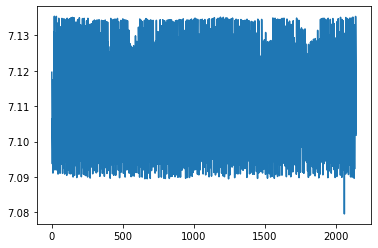

In [71]:
plt.plot(r)

(array([156., 259., 245., 257., 179., 192., 214., 241., 214., 186.]),
 array([-43.863195 , -42.5687704, -41.2743458, -39.9799212, -38.6854966,
        -37.391072 , -36.0966474, -34.8022228, -33.5077982, -32.2133736,
        -30.918949 ]),
 <BarContainer object of 10 artists>)

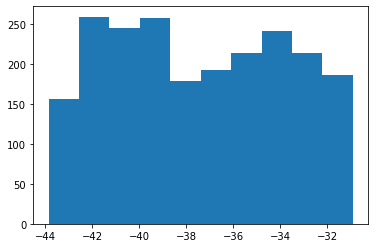

In [72]:
plt.hist(theta)

(array([  9.,  34., 105., 150., 344., 535., 410., 437., 102.,  17.]),
 array([-0.051118 , -0.0505664, -0.0500148, -0.0494632, -0.0489116,
        -0.04836  , -0.0478084, -0.0472568, -0.0467052, -0.0461536,
        -0.045602 ]),
 <BarContainer object of 10 artists>)

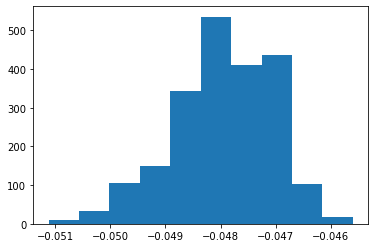

In [73]:
plt.hist(z)

## 3D plotting

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [74]:
from mpl_toolkits import mplot3d

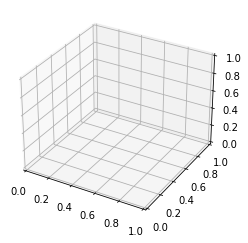

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [83]:
r=np.array(r)
theta=np.array(theta)
z=np.array(z)

x=r*np.cos(theta * np.pi / 180.)
y=r*np.sin(theta * np.pi / 180.)

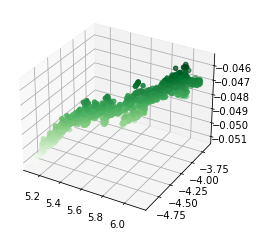

In [84]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens');

In [80]:
theta[0]


-43.861974

In [82]:
np.sin(theta[0])

0.12003302739873295